# Convolutional Neural Network Architecture


In [3]:
import numpy as np

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
data=np.load('/content/drive/My Drive/CTWS/Project1/data.npy')
target=np.load('/content/drive/My Drive/CTWS/Project1/target.npy')

#loading the save numpy arrays in the previous code

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 72s 2s/step - loss: 0.6922 - accuracy: 0.5828 - val_loss: 0.6573 - val_accuracy: 0.5766
Epoch 2/20
31/31 [==============================] - 72s 2s/step - loss: 0.4828 - accuracy: 0.7687 - val_loss: 0.3377 - val_accuracy: 0.8871
Epoch 3/20
31/31 [==============================] - 71s 2s/step - loss: 0.2626 - accuracy: 0.9020 - val_loss: 0.2478 - val_accuracy: 0.9194
Epoch 4/20
31/31 [==============================] - 71s 2s/step - loss: 0.1806 - accuracy: 0.9263 - val_loss: 0.1758 - val_accuracy: 0.9355
Epoch 5/20
31/31 [==============================] - 70s 2s/step - loss: 0.1628 - accuracy: 0.9424 - val_loss: 0.1556 - val_accuracy: 0.9395
Epoch 6/20
31/31 [==============================] - 69s 2s/step - loss: 0.1094 - accuracy: 0.9576 - val_loss: 0.2418 - val_accuracy: 0.9113
Epoch 7/20
31/31 [==============================] - 70s 2s/step - loss: 0.1572 - accuracy: 0.9455 - val_loss: 0.1479 - val_accuracy: 0.9435
Epoch 8/20
31/31 [==

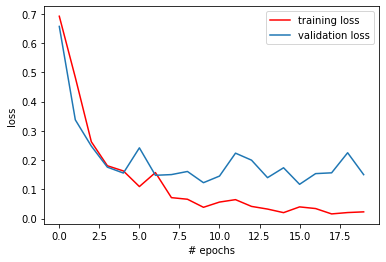

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

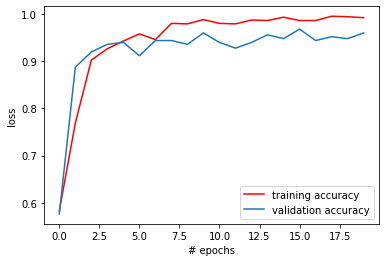

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 7s 1s/step - loss: 0.2641 - accuracy: 0.9348
[0.2640957832336426, 0.9347826242446899]
